# Percent of difference between Minimax using Margin and Support

In [66]:
from pref_voting.voting_methods import *
from pref_voting.profiles_with_ties import ProfileWithTies
from tqdm.notebook import tqdm
from zipfile import ZipFile
import glob
import io
import numpy as np

## Stable Voting Database  

In [67]:
profiles = [ProfileWithTies.read(fname) for fname in glob.glob('real_elections/stable_voting_dataset/*')]

num_diff = 0
num_no_cw = 0
for prof in tqdm(profiles): 
    prof.use_extended_strict_preference()
    cw = prof.condorcet_winner()
    if cw is not None:
        continue
    num_no_cw += 1
    minimax_ws = minimax(prof)
    minimax_ws_support = minimax(prof, strength_function=prof.support) 
    if minimax_ws != minimax_ws_support:
        num_diff += 1


print("Total number of elections: ", len(profiles)) 
print(f"{num_diff} out of {num_no_cw}: ", num_diff/num_no_cw)
print()
print(f"The average number of voters is {np.mean([p.num_voters for p in profiles])}")
print(f"The average number of candidates is {np.mean([len(p.candidates) for p in profiles])}")

  0%|          | 0/657 [00:00<?, ?it/s]

Total number of elections:  657
4 out of 133:  0.03007518796992481

The average number of voters is 9.386605783866058
The average number of candidates is 4.58751902587519


## Preflib Dataset

In [68]:
profiles = []
elections = []
file_names = []
for fname in tqdm(glob.glob("real_elections/preflib_dataset/*.soi")):

    election_name = fname.split("/")[-1].split(".")[0]

    if election_name in elections: 
        continue

    elections.append(election_name)
    file_names.append(fname)
    profiles.append(ProfileWithTies.read(fname))
    
for fname in tqdm(glob.glob("real_elections/preflib_dataset/*.toi")):

    election_name = fname.split("/")[-1].split(".")[0]

    if election_name in elections: 
        continue

    elections.append(election_name)
    file_names.append(fname)
    profiles.append(ProfileWithTies.read(fname))

for fname in tqdm(glob.glob("real_elections/preflib_dataset/*.toc")):

    election_name = fname.split("/")[-1].split(".")[0]

    if election_name in elections: 
        continue

    elections.append(election_name)
    file_names.append(fname)
    profiles.append(ProfileWithTies.read(fname))



  0%|          | 0/308 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/85 [00:00<?, ?it/s]

In [69]:

num_diff = 0
num_no_cw = 0
for prof in tqdm(profiles): 
    prof.use_extended_strict_preference()
    cw = prof.condorcet_winner()
    if cw is not None:
        continue
    num_no_cw += 1
    minimax_ws = minimax(prof)
    minimax_ws_support = minimax(prof, strength_function=prof.support) 
    if minimax_ws != minimax_ws_support:
        num_diff += 1

print("Total number of elections: ", len(profiles)) 

print(f"{num_diff} out of {num_no_cw}: ", num_diff/num_no_cw)

print()
print(f"The average number of voters is {np.mean([p.num_voters for p in profiles])}")
print(f"The average number of candidates is {np.mean([len(p.candidates) for p in profiles])}")

  0%|          | 0/364 [00:00<?, ?it/s]

Total number of elections:  364
1 out of 1:  1.0

The average number of voters is 44577.96703296703
The average number of candidates is 8.848901098901099


## CIVS Dataset

In [70]:
# read a json file
import json
profiles = []
_civs_elections = json.load(open("real_elections/civs_dataset/2024-12-15.json"))

civs_elections = _civs_elections['elections']
profiles = []
for election in tqdm(civs_elections):
    if election["test"] == "yes":
        continue
    ballots = []
    num_candidates = election['num_choices']
    for b in election['ballots']:
        ballots.append({cand: rank for cand, rank in enumerate(b) if rank != "?"})
    profiles.append(ProfileWithTies(ballots, candidates=list(range(num_candidates))))


  0%|          | 0/22477 [00:00<?, ?it/s]

In [ ]:

num_diff = 0
num_no_cw = 0
for prof in tqdm(profiles): 
    prof.use_extended_strict_preference()
    cw = prof.condorcet_winner()
    if cw is not None:
        continue
    num_no_cw += 1
    minimax_ws = minimax(prof)
    minimax_ws_support = minimax(prof, strength_function=prof.support) 
    if minimax_ws != minimax_ws_support:
        num_diff += 1

print("Total number of elections: ", len(profiles)) 

print(f"{num_diff} out of {num_no_cw}: ", num_diff/num_no_cw)

print()
print(f"The average number of voters is {np.mean([p.num_voters for p in profiles])}")
print(f"The average number of candidates is {np.mean([len(p.candidates) for p in profiles])}")

  0%|          | 0/22477 [00:00<?, ?it/s]

## Otis 2022 Dataset

In [52]:
# This will take about 17 minutes to run

items_to_skip = [
    'skipped', 
    'overvote', 
    'undervote']

profiles = []
enames = []
for file in tqdm(glob.glob("real_elections/otis_2022_dataset/*.zip")):

    if not file.endswith(".csv") and not file.endswith(".zip"):
        continue
    # if file ends with .zip unzip the file and process it 
    if file.endswith(".zip"):
        with ZipFile(file, 'r') as zip_ref:
            # Iterate through each file inside the zip
            for name in zip_ref.namelist():
                # Only process .csv files
                if name.endswith(".csv"):
                    with zip_ref.open(name) as f:
                        # Read the CSV data into memory
                        csv_bytes = f.read()
                        # Decode bytes to string
                        csv_text = csv_bytes.decode('utf-8')
                        # Create a file-like StringIO object
                        csv_buffer = io.StringIO(csv_text)
                        
                        # Now pass this StringIO to ProfileWithTies.read
                        prof = ProfileWithTies.read(
                            csv_buffer,
                            file_format='csv',
                            csv_format='rank_columns',
                            items_to_skip=items_to_skip
                        )
                        enames.append(name)
                        profiles.append(prof)


  0%|          | 0/458 [00:00<?, ?it/s]

In [ ]:
num_diff = 0
num_no_cw = 0
for prof in tqdm(profiles): 
    prof.use_extended_strict_preference()
    cw = prof.condorcet_winner()
    if cw is not None:
        continue
    num_no_cw += 1
    minimax_ws = minimax(prof)
    minimax_ws_support = minimax(prof, strength_function=prof.support) 
    if minimax_ws != minimax_ws_support:
        num_diff += 1

print("Total number of elections: ", len(profiles)) 

print(f"{num_diff} out of {num_no_cw}: ", num_diff/num_no_cw)

print()
print(f"The average number of voters is {np.mean([p.num_voters for p in profiles])}")
print(f"The average number of candidates is {np.mean([len(p.candidates) for p in profiles])}")

  0%|          | 0/458 [00:00<?, ?it/s]

Total number of elections:  458
1 out of 2:  0.5


## 2007 Govan Ward 7 Election

In [ ]:
fname = "real_elections/preflib_dataset/00008-00000009.soi"
govan_prof = ProfileWithTies.read(fname)

govan_prof.use_extended_strict_preference()
govan_prof.anonymize().display()

minimax.display(govan_prof)

print("Using support as the strength function: ")
minimax.display(govan_prof, strength_function=govan_prof.support)


+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+---+---+---+---+---+---+---+----+---+---+---+---+---+---+---+---+---+---+---+----+---+---+---+---+---+----+---+---+---+----+---+----+---+----+---+---+----+----+---+---+---+---+----+---+----+----+----+----+----+---+---+----+---+---+---+----+---+---+---+---+---+---+---+---+---+---+----+---+----+---+----+---+----+---+---+---+----+---+---+----+---+---+----+----+----+---+---+----+----+---+---+---+---+----+---+---+----+---+---+---+---+----+---+----+---+---+---+--

[3, 4, 6]
Minimax winner is {3}
Using support as the strength function: 
Minimax winner is {4}
+------+-----+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+----+----+
| 2521 | 768 | 1343 | 681 | 908 | 235 | 204 | 251 | 129 | 140 | 302 | 177 | 143 | 51 | 50 |
+------+-----+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+----+----+
|  h   |  f  |  d   |  d  |  f  |  h  |  h  |  h  |  d  |  f  |  d  |  h  |  f  | d  | f  |
|      |     |  f   |     |  d  |  d  |  f  |  d  |  h  |  h  |  f  |  f  |  d  | h  | h  |
|      |     |      |     |     |     |     |  f  |     |     |  h  |  d  |  h  | f  | d  |
+------+-----+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+----+----+


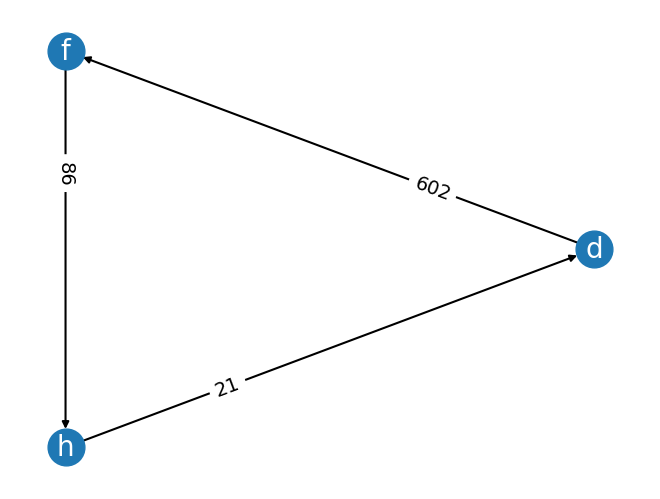

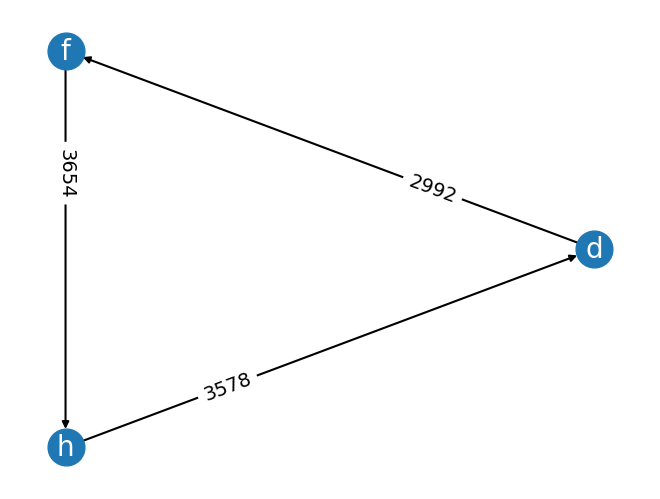

In [ ]:
s_set = smith_set(govan_prof)
print(s_set)
restricted_govan_prof = govan_prof.remove_candidates([c for c in govan_prof.candidates if c not in s_set]).anonymize()

restricted_govan_prof.remove_empty_rankings()

minimax.display(restricted_govan_prof)

print("Using support as the strength function: ")
minimax.display(restricted_govan_prof, strength_function=govan_prof.support)

new_cmap = {3:"d", 4:"f", 6:"h"}

restricted_govan_prof.display(cmap=new_cmap)

restricted_govan_prof.margin_graph().display(cmap=new_cmap)

restricted_govan_prof.display_support_graph(cmap=new_cmap)

## 2021 Minneapolis City Council Ward 2 Election

In [ ]:

file = "real_elections/otis_2022_dataset/Minneapolis_11022021_CityCouncilWard2.csv.zip"

items_to_skip = [
    'skipped', 
    'overvote', 
    'undervote']

with ZipFile(file, 'r') as zip_ref:
    for name in zip_ref.namelist():
        if name.endswith(".csv"):
            with zip_ref.open(name) as f:
                csv_bytes = f.read()
                csv_text = csv_bytes.decode('utf-8')
                csv_buffer = io.StringIO(csv_text)
                
                minneapolis_prof = ProfileWithTies.read(
                    csv_buffer,
                    file_format='csv',
                    csv_format='rank_columns',
                    items_to_skip=items_to_skip
                )
minneapolis_prof.use_extended_strict_preference()
minneapolis_prof.anonymize().display()

minimax.display(minneapolis_prof)

print("Using support as the strength function: ")
minimax.display(minneapolis_prof, strength_function=minneapolis_prof.support)

+------------------------+--------------+--------------+------------+------------------------+------------------------+------------------------+------------+------------------------+--------------+------------------------+------------------------+------------------------+------------+--------------+------------+--------------+--------------+------------------------+-----+--------------+--------------+------------------------+--------------+--------------+--------------+------------------------+--------------+------------------------+------------------------+--------------+--------------+------------------------+--------------+------------------------+------------------------+------------------------+------------------------+------------------------+------------------------+--------------+--------------+------------------------+---------+------------------------+------------------------+------------------------+--------------+--------------+------------+--------------+------------------

[0, 3, 4]
Minimax winner is {Yusra Arab}
Using support as the strength function: 
Minimax winner is {Robin Wonsley Worlobah}
+-----+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
| 334 | 1572 | 775 | 843 | 594 | 852 | 596 | 748 | 338 | 492 | 822 | 133 | 205 | 447 | 164 |
+-----+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|  g  |  a   |  a  |  g  |  a  |  w  |  g  |  w  |  w  |  w  |  g  |  a  |  g  |  w  |  a  |
|  w  |      |  g  |  w  |  w  |  g  |  a  |  a  |  a  |     |     |  g  |  a  |  g  |  w  |
|  a  |      |     |     |     |     |     |     |  g  |     |     |  w  |  w  |  a  |  g  |
+-----+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+


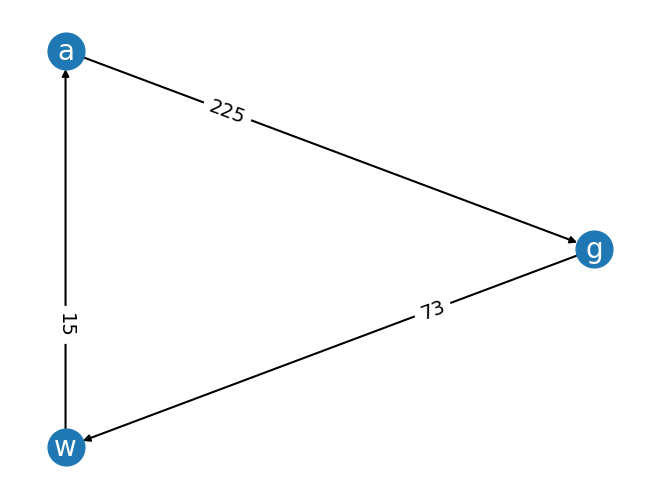

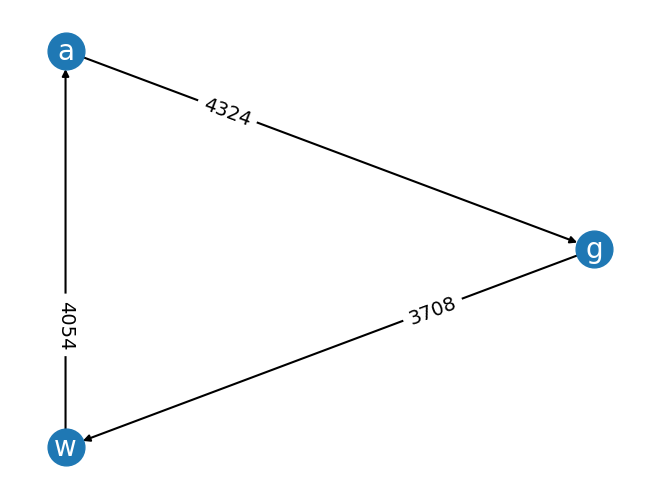

In [ ]:
s_set = smith_set(minneapolis_prof)
print(s_set)
restricted_minneapolis_prof = minneapolis_prof.remove_candidates([c for c in minneapolis_prof.candidates if c not in s_set]).anonymize()

restricted_minneapolis_prof.remove_empty_rankings()

minimax.display(restricted_minneapolis_prof)

print("Using support as the strength function: ")
minimax.display(restricted_minneapolis_prof, strength_function=minneapolis_prof.support)

new_cmap = {0:"g", 3:"a", 4:"w"}

restricted_minneapolis_prof.display(cmap=new_cmap)

restricted_minneapolis_prof.margin_graph().display(cmap=new_cmap)

restricted_minneapolis_prof.display_support_graph(cmap=new_cmap)